In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf  # Using formula API

In [2]:
df = pd.read_csv('../data/climate_change.csv')

In [3]:
df.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


### Metadata:

- **Year**: the observation year
- **Month**: the observation month
- **MEI**: multivariate El Nino Southern Oscillation index (MEI), a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures)
- **CO2**: atmospheric concentrations of carbon dioxide in ppmv (parts per million by volume)
- **CH4**: atmospheric concentrations of methane ppmv (parts per million by volume) 
- **N2O**: atmospheric concentrations of nitrous oxide ppmv (parts per million by volume)
- **CFC-11**: atmospheric concentrations of trichlorofluoromethane ppbv (parts per billion by volume)
- **CFC-12**: atmospheric concentrations of dichlorodifluoromethane ppbv (parts per billion by volume)
- **TSI**: the total solar irradiance in W/m2 (the rate at which the sun's energy is deposited per unit area)
- **Aerosols**: the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space.
- **Temp**: the difference in degrees Celsius between the average global temperature in that period and a reference value.

### Create training and test data sets:

In [4]:
df_train = df.query("Year <= 2006")
df_test = df.query("Year > 2006")

In [9]:
model1 = smf.ols(formula="Temp ~ MEI + CO2 + CH4 + N2O + Q('CFC-11') + Q('CFC-12') + TSI + Aerosols", data=df_train).fit()

In [10]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           1.94e-78
Time:                        21:42:53   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -124.5943     19.887     -6.265      0.000    -163.744     -85.445
MEI             0.0642      0.006      9.923      0.000       0.051       0.077
CO2             0.0065      0.002      2.826      0.005       0.002       0.011
CH4             0.0001      0.001      0.240      0.810      -0.001       0.001
N2O            -0.0165      0.009     -1.930      0.055      -0.033       0.000
Q('CFC-11')    -0.0066      0.002     -4.078      0.000      -0.010      -0.003
Q('CFC-12')     0.0038      0.001      3.757      0.000       0.002       0.006
TSI             0.0931      0.015      6.313      0.000       0.064       0.122
Aerosols       -1.5376      0.213     -7.210      0.000      -1.957      -1.118
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.327
Skew:                           0.289   Prob(JB):                      0.00572
Kurtosis:                       3.733   Cond. No.                     8.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q:** What is R-square value?

**A:** 0.75

**Q:** Which variables are significant in the model?

**A:** All except CH4 and N2O

In [11]:
corr = df_train.corr()

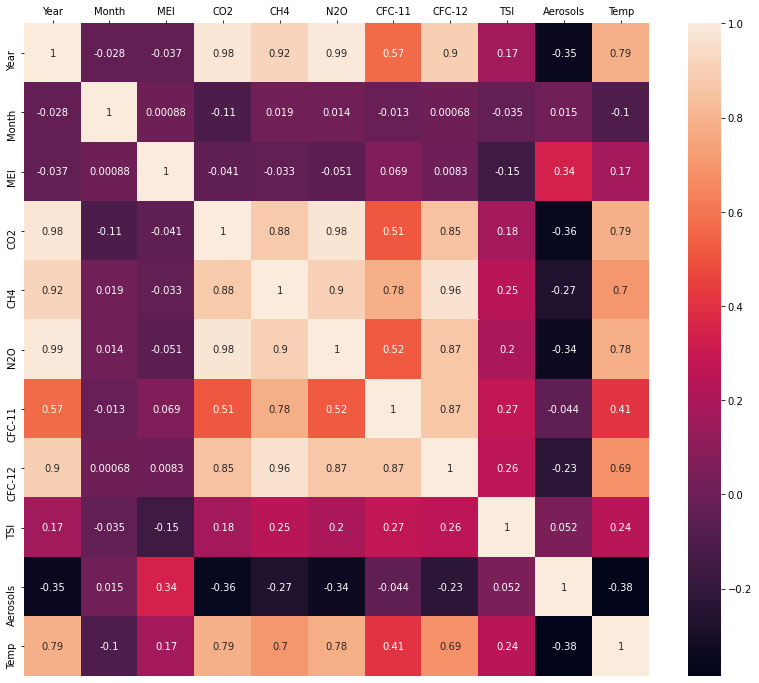

In [12]:
fig, ax = plt.subplots(figsize=(14,12))
ax.xaxis.set_ticks_position('top')
sns.heatmap(data=corr, annot=True);

In [13]:
model2 = smf.ols(formula="Temp ~ MEI + TSI + Aerosols + N2O", data=df_train).fit()

In [15]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     184.9
Date:                Mon, 06 Jul 2020   Prob (F-statistic):           3.52e-77
Time:                        22:13:28   Log-Likelihood:                 266.64
No. Observations:                 284   AIC:                            -523.3
Df Residuals:                     279   BIC:                            -505.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -116.2269     20.223     -5.747      0.000    -156.036     -76.418
MEI            0.0642      0.007      9.649      0.000       0.051       0.077
TSI            0.0795      0.015      5.344      0.000       0.050       0.109
Aerosols      -1.7017      0.218     -7.806      0.000      -2.131      -1.273
N2O            0.0253      0.001     19.307      0.000       0.023       0.028
==============================================================================
Omnibus:                       10.908   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.097
Skew:                           0.289   Prob(JB):                     0.000527
Kurtosis:                       3.971   Cond. No.                     5.00e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Q:** What is the coefficient for N2O?

**A:** 0.0253

**Q:** What is the R-square value for this reduced model?

**A:** 0.726